# Miniproject-1

The detailed comment can be found in the source code.

Note: In this analysis notebook, we use numpy to save the history of training loss and accuracy of each model for convenience of visualization.

However, in our test section, we only use torch as demanded in the description.

# 1. Loading and Preparing Data

In [1]:
import torch
import math
from torch import optim
from torch import Tensor
from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import dlc_practical_prologue as prologue
#train_input, train_target, train_classes, test_input, test_target, test_classes= prologue.generate_pair_sets(1000)
train_input,train_target,train_class,test_input,test_target,test_class=prologue.generate_pair_sets(1000)
train_mean, train_std = train_input.mean(), train_input.std()
train_input.sub_(train_mean).div_(train_std)
test_input.sub_(train_mean).div_(train_std)
print('train_input', train_input.size(), 'train_target', train_target.size(),'train_class', train_class.size())
print('test_input', test_input.size(), 'test_target', test_target.size(),'test_class', test_class.size())

train_input torch.Size([1000, 2, 14, 14]) train_target torch.Size([1000]) train_class torch.Size([1000, 2])
test_input torch.Size([1000, 2, 14, 14]) test_target torch.Size([1000]) test_class torch.Size([1000, 2])


# 2. Preparing Auxiliary Function

In [3]:
def evaluate_result(train_loss_list,train_accuracy_list, test_loss_list,test_accuracy_list, title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    ax1.set_yscale('log')
    ax1.plot(train_loss_list, label = "training loss")
    ax1.plot(test_loss_list, label = "validation loss")
    ax1.set_ylabel('categorical cross entropy')
    ax1.set_xlabel('epoch')
    ax1.legend()
    ax2.plot(train_accuracy_list, label = "training accuracy")
    ax2.plot(test_accuracy_list, label = "validation accuracy")
    ax2.set_ylabel('classification accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend()
    print("The Best Validation Accuracy is : {:.4f}..".format(max(test_accuracy_list)))

In [4]:
def plot_different_histories(train_loss_list_1,train_accuracy_list_1, test_loss_list_1,test_accuracy_list_1,
                             train_loss_list_2,train_accuracy_list_2, test_loss_list_2,test_accuracy_list_2,
                             train_loss_list_3,train_accuracy_list_3, test_loss_list_3,test_accuracy_list_3,
                             train_loss_list_4,train_accuracy_list_4, test_loss_list_4,test_accuracy_list_4,
                             train_loss_list_5=None,train_accuracy_list_5=None, test_loss_list_5=None,test_accuracy_list_5=None,
                             label_1='', label_2='', label_3='', label_4='', label_5='',title='',nb=4, loss=True):
    
    if loss==False:
        fig, ax = plt.subplots(1,1,figsize=(10, 6))
        fig.suptitle(title)
        ax.plot(train_accuracy_list_1, label = label_1+" training accuracy",c='r')
        ax.plot(test_accuracy_list_1, label =label_1+ " validation accuracy",c='r',linestyle='--')
        ax.plot(train_accuracy_list_2, label = label_2+" training accuracy",c='g')
        ax.plot(test_accuracy_list_2, label =label_2+ " validation accuracy",c='g',linestyle='--')
        ax.plot(train_accuracy_list_3, label = label_3+" training accuracy",c='b')
        ax.plot(test_accuracy_list_3, label =label_3+ " validation accuracy",c='b',linestyle='--')
        ax.plot(train_accuracy_list_4, label = label_4+" training accuracy",c='y')
        ax.plot(test_accuracy_list_4, label =label_4+ " validation accuracy",c='y',linestyle='--')
        ax.set_ylabel('boolean classification accuracy')
        ax.set_xlabel('epoch')
        ax.legend()
        return
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 7))
    fig.suptitle(title)
    ax1.set_yscale('log')                    
    if nb==4:
        ax1.set_yscale('log')
        ax1.plot(train_loss_list_1, label = label_1+" training loss",c='r')
        ax1.plot(test_loss_list_1, label = label_1+" validation loss",c='r',linestyle='--')
        ax1.plot(train_loss_list_2, label = label_2+" training loss",c='g')
        ax1.plot(test_loss_list_2, label = label_2+" validation loss",c='g',linestyle='--')
        ax1.plot(train_loss_list_3, label = label_3+" training loss",c='b')
        ax1.plot(test_loss_list_3, label = label_3+" validation loss",c='b',linestyle='--')
        ax1.plot(train_loss_list_4, label = label_4+" training loss",c='y')
        ax1.plot(test_loss_list_4, label = label_4+" validation loss",c='y',linestyle='--')
        ax1.set_ylabel('categorical cross entropy')
        ax1.set_xlabel('epoch')
        ax1.legend()
        ax2.plot(train_accuracy_list_1, label = label_1+" training accuracy",c='r')
        ax2.plot(test_accuracy_list_1, label =label_1+ " validation accuracy",c='r',linestyle='--')
        ax2.plot(train_accuracy_list_2, label = label_2+" training accuracy",c='g')
        ax2.plot(test_accuracy_list_2, label =label_2+ " validation accuracy",c='g',linestyle='--')
        ax2.plot(train_accuracy_list_3, label = label_3+" training accuracy",c='b')
        ax2.plot(test_accuracy_list_3, label =label_3+ " validation accuracy",c='b',linestyle='--')
        ax2.plot(train_accuracy_list_4, label = label_4+" training accuracy",c='y')
        ax2.plot(test_accuracy_list_4, label =label_4+ " validation accuracy",c='y',linestyle='--')
        ax2.set_ylabel('classification accuracy')
        ax2.set_xlabel('epoch')
        ax2.legend()
        
    else:
        ax1.set_yscale('log')
        ax1.plot(train_loss_list_1, label = label_1+" training loss",c='r')
        ax1.plot(test_loss_list_1, label = label_1+" validation loss",c='r',linestyle='--')
        ax1.plot(train_loss_list_2, label = label_2+" training loss",c='g')
        ax1.plot(test_loss_list_2, label = label_2+" validation loss",c='g',linestyle='--')
        ax1.plot(train_loss_list_3, label = label_3+" training loss",c='b')
        ax1.plot(test_loss_list_3, label = label_3+" validation loss",c='b',linestyle='--')
        ax1.plot(train_loss_list_4, label = label_4+" training loss",c='y')
        ax1.plot(test_loss_list_4, label = label_4+" validation loss",c='y',linestyle='--')
        ax1.plot(train_loss_list_5, label = label_5+" training loss",c='brown')
        ax1.plot(test_loss_list_5, label = label_5+" validation loss",c='brown',linestyle='--')
        ax1.set_ylabel('categorical cross entropy')
        ax1.set_xlabel('epoch')
        ax1.legend()
        ax2.plot(train_accuracy_list_1, label = label_1+" training accuracy",c='r')
        ax2.plot(test_accuracy_list_1, label =label_1+ " validation accuracy",c='r',linestyle='--')
        ax2.plot(train_accuracy_list_2, label = label_2+" training accuracy",c='g')
        ax2.plot(test_accuracy_list_2, label =label_2+ " validation accuracy",c='g',linestyle='--')
        ax2.plot(train_accuracy_list_3, label = label_3+" training accuracy",c='b')
        ax2.plot(test_accuracy_list_3, label =label_3+ " validation accuracy",c='b',linestyle='--')
        ax2.plot(train_accuracy_list_4, label = label_4+" training accuracy",c='y')
        ax2.plot(test_accuracy_list_4, label =label_4+ " validation accuracy",c='y',linestyle='--')
        ax2.plot(train_accuracy_list_5, label = label_5+" training accuracy",c='brown')
        ax2.plot(test_accuracy_list_5, label =label_5+ " validation accuracy",c='brown',linestyle='--')
        ax2.set_ylabel('classification accuracy')
        ax2.set_xlabel('epoch')
        ax2.legend()

In [5]:
def train_model(model , optim='SGD',
                train_input=train_input, train_target=train_target, 
                test_input=test_input, test_target=test_target,
                epochs=50, batch_size=100, learning_rate=1e-3, momentum=0,
                 if_print=False):
    criterion = nn.CrossEntropyLoss()
    if optim=='SGD':
        optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=momentum)
    elif optim=='Adam':
        optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
    train_loss_list=train_accuracy_list=[]
    valid_loss_list=valid_accuracy_list=[]
    test_loss_list=test_accuracy_list=[]
    for e in range(epochs):
        for b in range(0, train_input.size(0), batch_size):
            temp_train_input=train_input.narrow(0, b, batch_size)    
            temp_train_target=train_target.narrow(0, b, batch_size)
            train_output = model(temp_train_input)
            loss = criterion(train_output, temp_train_target)
            model.zero_grad()
            loss.backward()
            optimizer.step()
                
        train_temp_output = model(train_input)
        train_temp_loss = criterion(train_temp_output, train_target)
        _, temp_train_pred =torch.max(F.softmax(train_temp_output).data, 1)
        train_temp_accuracy=((temp_train_pred == train_target).sum().item())/train_input.size(0)
        
        test_temp_output=model(test_input)
        test_temp_loss = criterion(test_temp_output, test_target)
        _, temp_test_pred =torch.max(F.softmax(test_temp_output).data, 1)
        test_temp_accuracy=((temp_test_pred == test_target).sum().item())/test_input.size(0)
        
        train_loss_list=train_loss_list+[train_temp_loss]
        train_accuracy_list=train_accuracy_list+[train_temp_accuracy]
        test_loss_list=test_loss_list+[test_temp_loss]
        test_accuracy_list=test_accuracy_list+[test_temp_accuracy]
        
        if if_print:
            print("Epoch: {}/{}..".format(e+1, epochs),
                  "Training Loss: {:.4f}..".format(train_temp_loss),
                  "Training Accuracy: {:.4f}..".format(train_temp_accuracy), 
                  "Validation Loss: {:.4f}..".format(test_temp_loss),
                  "Validation Accuracy: {:.4f}..".format(test_temp_accuracy),  )
                

    return model, train_loss_list,train_accuracy_list, test_loss_list,test_accuracy_list
        

In [6]:
def weights_init(m):
    if isinstance(m, nn.Conv1d) or isinstance(m,nn.Linear):
        m.weight.data.normal_(0.0, 0.05)
        m.bias.data.fill_(0)

In [7]:
import random
def data_init(train_input,train_target, train_class, num=1000):
    index=[i for i in range(num)]
    random.shuffle(index)
    new_train_input=train_input[index,:,:,:]
    new_train_target=train_target[index]
    new_train_class=train_class[index,:]
    
    return new_train_input,new_train_target,  new_train_class

train_input, train_target, train_class = data_init(train_input,train_target, train_class, num=1000)

# 3. MLP

In [8]:
class MLP(nn.Module):
    '''
    define MLP model
    input: number of layer ; number of hidden neuron in layer
  
    '''
    def __init__(self,nb_layer=1,nb_hidden_neuron=50):
        super(MLP, self).__init__()
        self.fc_1 = nn.Linear(392 ,nb_hidden_neuron)
        self.fc_2 = nn.Linear(nb_hidden_neuron ,nb_hidden_neuron)
        self.fc_3 = nn.Linear(nb_hidden_neuron, 2)
        
        self.fc_one_layer=nn.Linear(392 ,2)
        self.nb_layer=nb_layer

    def forward(self, x):
        x=x.view(x.size(0),-1)
        if self.nb_layer==1:
            x=self.fc_one_layer(x)
        else:
            # build 3 linear layers according to input layer number
            x = F.relu(self.fc_1(x))
            x = F.relu(self.fc_2(x))
            x = self.fc_3(x)
        return x
    
    def predict(self, x):
        logits = self.forward(x)
        return F.softmax(logits)

### 3.1 1-layer MLP

Epoch: 1/50.. Training Loss: 0.8800.. Training Accuracy: 0.4940.. Validation Loss: 0.8532.. Validation Accuracy: 0.5250..
Epoch: 2/50.. Training Loss: 0.7732.. Training Accuracy: 0.5300.. Validation Loss: 0.7554.. Validation Accuracy: 0.5630..
Epoch: 3/50.. Training Loss: 0.7282.. Training Accuracy: 0.5590.. Validation Loss: 0.7166.. Validation Accuracy: 0.5760..
Epoch: 4/50.. Training Loss: 0.7045.. Training Accuracy: 0.5870.. Validation Loss: 0.6968.. Validation Accuracy: 0.5930..
Epoch: 5/50.. Training Loss: 0.6883.. Training Accuracy: 0.5970.. Validation Loss: 0.6828.. Validation Accuracy: 0.5980..
Epoch: 6/50.. Training Loss: 0.6750.. Training Accuracy: 0.6070.. Validation Loss: 0.6710.. Validation Accuracy: 0.6090..
Epoch: 7/50.. Training Loss: 0.6632.. Training Accuracy: 0.6180.. Validation Loss: 0.6602.. Validation Accuracy: 0.6180..
Epoch: 8/50.. Training Loss: 0.6525.. Training Accuracy: 0.6210.. Validation Loss: 0.6501.. Validation Accuracy: 0.6210..
Epoch: 9/50.. Training L

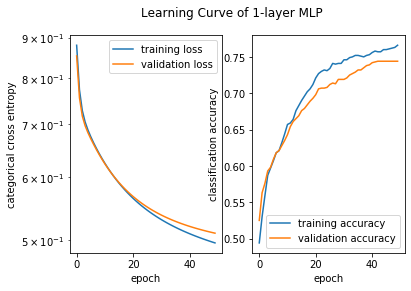

In [9]:
model_mlp1=MLP(nb_layer=1)
model_mlp1.apply(weights_init)
model_mlp1,train_loss_mlp1,train_accuracy_mlp1, test_loss_mlp1,test_accuracy_mlp1=train_model(model_mlp1,if_print=True, 
                                                                                              optim='SGD',learning_rate=0.001)
evaluate_result(train_loss_mlp1,train_accuracy_mlp1, test_loss_mlp1,test_accuracy_mlp1, 'Learning Curve of 1-layer MLP')

In [13]:
import numpy as np
np.save('save/train_loss_mlp1.npy',np.array(train_loss_mlp1 ))
np.save('save/train_accuracy_mlp1.npy',np.array(train_accuracy_mlp1 ))
np.save('save/test_loss_mlp1.npy',np.array(test_loss_mlp1 ))
np.save('save/test_accuracy_mlp1.npy',np.array(test_accuracy_mlp1 ))

### 3.2 3-Layer MLP

The Best Validation Accuracy is : 0.7740..


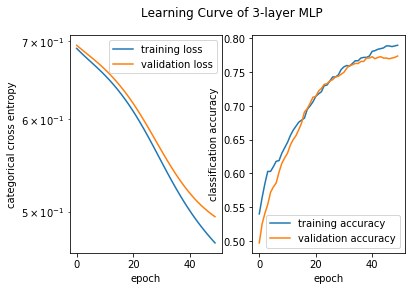

In [25]:
model_mlp3=MLP(nb_layer=3,nb_hidden_neuron=100)
model_mlp1.apply(weights_init)
model_mlp3,train_loss_mlp3,train_accuracy_mlp3, test_loss_mlp3,test_accuracy_mlp3=train_model(model_mlp3,if_print=False, 
                                                                                              optim='SGD',learning_rate=0.005)
evaluate_result(train_loss_mlp3,train_accuracy_mlp3, test_loss_mlp3,test_accuracy_mlp3, 'Learning Curve of 3-layer MLP')

In [26]:
import numpy as np
np.save('save/train_loss_mlp3.npy',np.array(train_loss_mlp3 ))
np.save('save/train_accuracy_mlp3.npy',np.array(train_accuracy_mlp3 ))
np.save('save/test_loss_mlp3.npy',np.array(test_loss_mlp3 ))
np.save('save/test_accuracy_mlp3.npy',np.array(test_accuracy_mlp3 ))

# 4. Simple Convolution Network

### 4.1 First CNN (shrinking fast)

In [21]:
class ConvNet_1(nn.Module):
    def __init__(self, bn=False, dropout=0, activation='relu' ):
        super(ConvNet_1, self).__init__()
        self.conv1 = nn.Conv2d(2, 8, kernel_size=3)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.fc1 = nn.Linear(16*2*2 ,64)
        self.fc2 = nn.Linear(64, 2)
        self.bn16 = torch.nn.BatchNorm2d(16)
        self.bn16 = torch.nn.BatchNorm2d(32)
        self.bn=bn
        self.activation=activation
        self.dropout=dropout

    def forward(self, x):
        x=self.conv1(x)
        if self.activation=='sigmoid':
            x=F.sigmoid(x)
        else:
            x=F.relu(x)
            
        x=F.max_pool2d(x, kernel_size=2, stride=2)
            
        x=self.conv2(x)
        if self.bn:
            x=self.bn16(x)
        if self.activation=='sigmoid':
            x=F.sigmoid(x)
        else:
            x=F.relu(x)
            
        x=F.max_pool2d(x, kernel_size=2, stride=2)
        
        if self.dropout>0:
            x = F.dropout(x, p=self.dropout,training=self.training)
        
        
        x=x.view(x.size(0),-1)
        x=self.fc1(x)
        x=F.relu(x)
        if self.dropout>0:
            x = F.dropout(x, p=self.dropout,training=self.training)
        x = self.fc2(x)
    
        return x
    
    def predict(self, x):
        logits = self.forward(x)
        return F.softmax(logits)

The Best Validation Accuracy is : 0.7680..


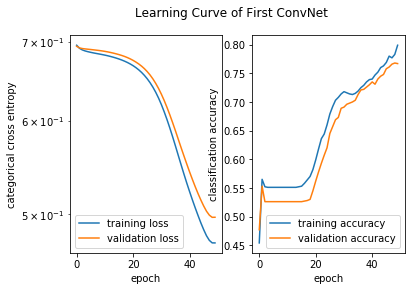

In [22]:
model_cnn1=ConvNet_1()
model_cnn1.apply(weights_init)
model_cnn1,train_loss_cnn1,train_accuracy_cnn1, test_loss_cnn1,test_accuracy_cnn1=train_model(model_cnn1,if_print=False, 
                                                                                              optim='SGD',learning_rate=0.025)
evaluate_result(train_loss_cnn1,train_accuracy_cnn1, test_loss_cnn1,test_accuracy_cnn1, 'Learning Curve of First ConvNet')

In [23]:
import numpy as np
np.save('save/train_loss_cnn1.npy',np.array(train_loss_cnn1 ))
np.save('save/train_accuracy_cnn1.npy',np.array(train_accuracy_cnn1 ))
np.save('save/test_loss_cnn1.npy',np.array(test_loss_cnn1 ))
np.save('save/test_accuracy_cnn1.npy',np.array(test_accuracy_cnn1 ))

### 4.2 Second CNN (shrinking slow)

In [13]:
class ConvNet_2(nn.Module):
    def __init__(self, bn=False, dropout=0, activation='relu' ):
        super(ConvNet_2, self).__init__()
        self.conv1 = nn.Conv2d(2, 8, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.fc1 = nn.Linear(16*6*6 ,64)
        self.fc2 = nn.Linear(64, 2)
        self.bn8 = torch.nn.BatchNorm2d(8)
        self.bn16 = torch.nn.BatchNorm2d(16)
        self.bn32 = torch.nn.BatchNorm2d(32)
        self.bn=bn
        self.activation=activation
        self.dropout=dropout
    def forward(self, x):
        x=self.conv1(x)
        if self.activation=='sigmoid':
            x=F.sigmoid(x)
        else:
            x=F.relu(x)
            
        if self.bn:
            x=self.bn8(x)
            
        if self.dropout>0:
            x = F.dropout(x, p=self.dropout,training=self.training)
            
        x=self.conv2(x)
        if self.activation=='sigmoid':
            x=F.sigmoid(x)
        else:
            x=F.relu(x)
        if self.bn:
            x=self.bn16(x)
        
        if self.dropout>0:
            x = F.dropout(x, p=self.dropout,training=self.training)
         
        x=F.max_pool2d(x, kernel_size=2, stride=2)
        
        
        
        
        x=x.view(x.size(0),-1)
        x=self.fc1(x)
        x=F.relu(x)
        x = self.fc2(x)
    
        return x
    
    def predict(self, x):
        logits = self.forward(x)
        return F.softmax(logits)

Epoch: 1/50.. Training Loss: 0.6903.. Training Accuracy: 0.5400.. Validation Loss: 0.6920.. Validation Accuracy: 0.5220..
Epoch: 2/50.. Training Loss: 0.6869.. Training Accuracy: 0.5510.. Validation Loss: 0.6896.. Validation Accuracy: 0.5360..
Epoch: 3/50.. Training Loss: 0.6840.. Training Accuracy: 0.5540.. Validation Loss: 0.6874.. Validation Accuracy: 0.5290..
Epoch: 4/50.. Training Loss: 0.6813.. Training Accuracy: 0.5530.. Validation Loss: 0.6850.. Validation Accuracy: 0.5310..
Epoch: 5/50.. Training Loss: 0.6785.. Training Accuracy: 0.5550.. Validation Loss: 0.6825.. Validation Accuracy: 0.5310..
Epoch: 6/50.. Training Loss: 0.6754.. Training Accuracy: 0.5620.. Validation Loss: 0.6796.. Validation Accuracy: 0.5350..
Epoch: 7/50.. Training Loss: 0.6720.. Training Accuracy: 0.5720.. Validation Loss: 0.6762.. Validation Accuracy: 0.5410..
Epoch: 8/50.. Training Loss: 0.6681.. Training Accuracy: 0.5890.. Validation Loss: 0.6724.. Validation Accuracy: 0.5590..
Epoch: 9/50.. Training L

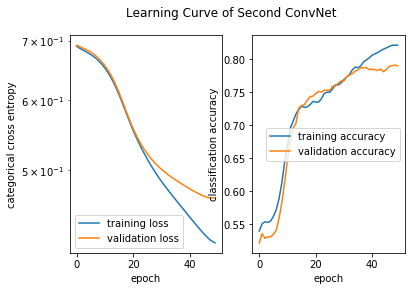

In [14]:
model_cnn2=ConvNet_2()
model_cnn2.apply(weights_init)
model_cnn2,train_loss_cnn2,train_accuracy_cnn2, test_loss_cnn2,test_accuracy_cnn2=train_model(model_cnn2,if_print=True, 
                                                                                              optim='SGD',learning_rate=0.025)
evaluate_result(train_loss_cnn2,train_accuracy_cnn2, test_loss_cnn2,test_accuracy_cnn2, 'Learning Curve of Second ConvNet')

In [15]:
import numpy as np
np.save('save/train_loss_cnn2.npy',np.array(train_loss_cnn2 ))
np.save('save/train_accuracy_cnn2.npy',np.array(train_accuracy_cnn2 ))
np.save('save/test_loss_cnn2.npy',np.array(test_loss_cnn2 ))
np.save('save/test_accuracy_cnn2.npy',np.array(test_accuracy_cnn2 ))

# Comparison among MLP and CNN

In [7]:
import numpy as np
train_loss_mlp1=np.load('save/train_loss_mlp1.npy')
train_accuracy_mlp1=np.load('save/train_accuracy_mlp1.npy')
test_loss_mlp1=np.load('save/test_loss_mlp1.npy')
test_accuracy_mlp1=np.load('save/test_accuracy_mlp1.npy')

In [8]:
train_loss_mlp3=np.load('save/train_loss_mlp3.npy')
train_accuracy_mlp3=np.load('save/train_accuracy_mlp3.npy')
test_loss_mlp3=np.load('save/test_loss_mlp3.npy')
test_accuracy_mlp3=np.load('save/test_accuracy_mlp3.npy')

In [9]:
train_loss_cnn1=np.load('save/train_loss_cnn1.npy')
train_accuracy_cnn1=np.load('save/train_accuracy_cnn1.npy')
test_loss_cnn1=np.load('save/test_loss_cnn1.npy')
test_accuracy_cnn1=np.load('save/test_accuracy_cnn1.npy')

In [10]:
train_loss_cnn2=np.load('save/train_loss_cnn2.npy')
train_accuracy_cnn2=np.load('save/train_accuracy_cnn2.npy')
test_loss_cnn2=np.load('save/test_loss_cnn2.npy')
test_accuracy_cnn2=np.load('save/test_accuracy_cnn2.npy')

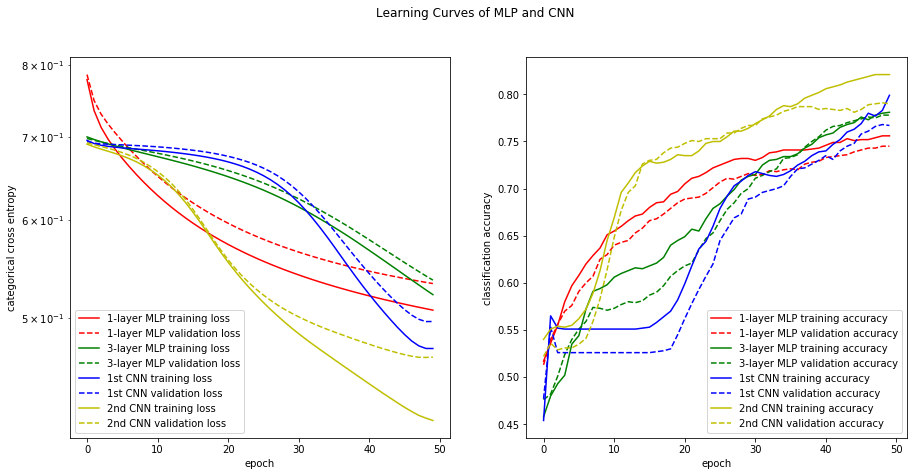

In [20]:
plot_different_histories(train_loss_mlp1,train_accuracy_mlp1, test_loss_mlp1,test_accuracy_mlp1,
                             train_loss_mlp3,train_accuracy_mlp3, test_loss_mlp3,test_accuracy_mlp3,
                             train_loss_cnn1,train_accuracy_cnn1,test_loss_cnn1,test_accuracy_cnn1,
                             train_loss_cnn2,train_accuracy_cnn2, test_loss_cnn2,test_accuracy_cnn2,
                             label_1='1-layer MLP', label_2='3-layer MLP', label_3='1st CNN', label_4='2nd CNN',
                             title='Learning Curves of MLP and CNN')

### 4.3 Regularization

### 4.3.1 Dropout

Epoch: 1/50.. Training Loss: 0.6587.. Training Accuracy: 0.6770.. Validation Loss: 0.6640.. Validation Accuracy: 0.6710..
Epoch: 2/50.. Training Loss: 0.6045.. Training Accuracy: 0.7170.. Validation Loss: 0.6185.. Validation Accuracy: 0.7050..
Epoch: 3/50.. Training Loss: 0.5576.. Training Accuracy: 0.7370.. Validation Loss: 0.5586.. Validation Accuracy: 0.7370..
Epoch: 4/50.. Training Loss: 0.5635.. Training Accuracy: 0.6990.. Validation Loss: 0.5620.. Validation Accuracy: 0.7090..
Epoch: 5/50.. Training Loss: 0.5313.. Training Accuracy: 0.7430.. Validation Loss: 0.5439.. Validation Accuracy: 0.7270..
Epoch: 6/50.. Training Loss: 0.4986.. Training Accuracy: 0.7590.. Validation Loss: 0.5137.. Validation Accuracy: 0.7570..
Epoch: 7/50.. Training Loss: 0.5008.. Training Accuracy: 0.7570.. Validation Loss: 0.5151.. Validation Accuracy: 0.7610..
Epoch: 8/50.. Training Loss: 0.4945.. Training Accuracy: 0.7580.. Validation Loss: 0.5040.. Validation Accuracy: 0.7680..
Epoch: 9/50.. Training L

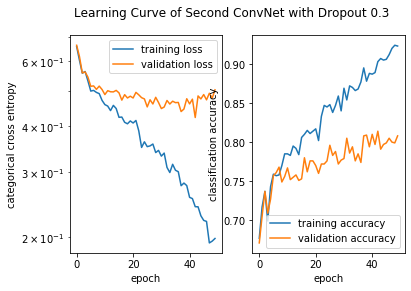

In [9]:
model_cnn2_dp=ConvNet_2(dropout=0.3)
model_cnn2_dp.apply(weights_init)
model_cnn2_dp,train_loss_cnn2_dp,train_accuracy_cnn2_dp, test_loss_cnn2_dp,test_accuracy_cnn2_dp=\
           train_model(model_cnn2_dp,if_print=True, optim='Adam', learning_rate=0.001)
evaluate_result(train_loss_cnn2_dp,train_accuracy_cnn2_dp, test_loss_cnn2_dp,test_accuracy_cnn2_dp, \
                'Learning Curve of Second ConvNet with Dropout 0.3')

In [10]:
import numpy as np
np.save('save/train_loss_cnn2_dp.npy',np.array(train_loss_cnn2_dp ))
np.save('save/train_accuracy_cnn2_dp.npy',np.array(train_accuracy_cnn2_dp ))
np.save('save/test_loss_cnn2_dp.npy',np.array(test_loss_cnn2_dp ))
np.save('save/test_accuracy_cnn2_dp.npy',np.array(test_accuracy_cnn2_dp ))

### 4.3.2 Adding Batch  Normalization

The Best Validation Accuracy is : 0.8280..


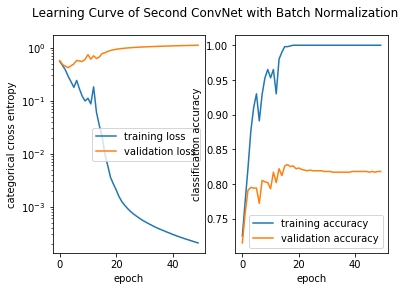

In [11]:
model_cnn2_bn=ConvNet_2(bn=True)
model_cnn2_bn.apply(weights_init)
model_cnn2_bn,train_loss_cnn2_bn,train_accuracy_cnn2_bn, test_loss_cnn2_bn,test_accuracy_cnn2_bn=\
           train_model(model_cnn2_bn,if_print=False, optim='Adam', learning_rate=0.01)
evaluate_result(train_loss_cnn2_bn,train_accuracy_cnn2_bn, test_loss_cnn2_bn,test_accuracy_cnn2_bn, \
                'Learning Curve of Second ConvNet with Batch Normalization')

In [12]:
import numpy as np
np.save('save/train_loss_cnn2_bn.npy',np.array(train_loss_cnn2_bn ))
np.save('save/train_accuracy_cnn2_bn.npy',np.array(train_accuracy_cnn2_bn ))
np.save('save/test_loss_cnn2_bn.npy',np.array(test_loss_cnn2_bn ))
np.save('save/test_accuracy_cnn2_bn.npy',np.array(test_accuracy_cnn2_bn ))

### 4.4 Change the Activation Function

The Best Validation Accuracy is : 0.5260..


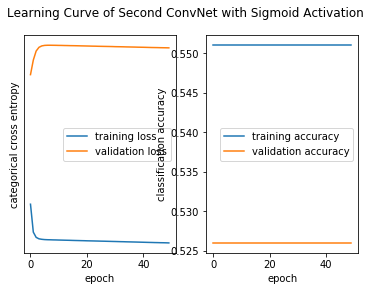

In [6]:
model_cnn2_sigmoid=ConvNet_2(activation='sigmoid')
model_cnn2_sigmoid.apply(weights_init)
model_cnn2_sigmoid,train_loss_cnn2_sigmoid,train_accuracy_cnn2_sigmoid, test_loss_cnn2_sigmoid,test_accuracy_cnn2_sigmoid=\
                                  train_model(model_cnn2_sigmoid,if_print=False, learning_rate=0.01,optim='Adam')
evaluate_result(train_loss_cnn2_sigmoid,train_accuracy_cnn2_sigmoid, test_loss_cnn2_sigmoid,test_accuracy_cnn2_sigmoid,\
                'Learning Curve of Second ConvNet with Sigmoid Activation')

In [7]:
import numpy as np
np.save('save/train_loss_cnn2_sigmoid.npy',np.array(train_loss_cnn2_sigmoid ))
np.save('save/train_accuracy_cnn2_sigmoid.npy',np.array(train_accuracy_cnn2_sigmoid ))
np.save('save/test_loss_cnn2_sigmoid.npy',np.array(test_loss_cnn2_sigmoid ))
np.save('save/test_accuracy_cnn2_sigmoid.npy',np.array(test_accuracy_cnn2_sigmoid ))

The Best Validation Accuracy is : 0.8060..


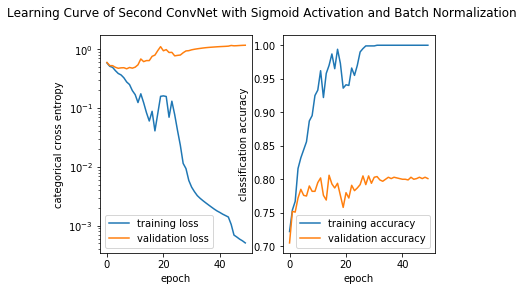

In [11]:
model_cnn2_sigmoid_bn=ConvNet_2(activation='sigmoid',bn=True)
model_cnn2_sigmoid_bn.apply(weights_init)
model_cnn2_sigmoid_bn,train_loss_cnn2_sigmoid_bn,train_accuracy_cnn2_sigmoid_bn, test_loss_cnn2_sigmoid_bn,test_accuracy_cnn2_sigmoid_bn=\
                                  train_model(model_cnn2_sigmoid_bn,if_print=False, optim='Adam', learning_rate=0.01)
evaluate_result(train_loss_cnn2_sigmoid_bn,train_accuracy_cnn2_sigmoid_bn, test_loss_cnn2_sigmoid_bn,test_accuracy_cnn2_sigmoid_bn,\
                'Learning Curve of Second ConvNet with Sigmoid Activation and Batch Normalization')

In [12]:
import numpy as np
np.save('save/train_loss_cnn2_sigmoid_bn.npy',np.array(train_loss_cnn2_sigmoid_bn ))
np.save('save/train_accuracy_cnn2_sigmoid_bn.npy',np.array(train_accuracy_cnn2_sigmoid_bn ))
np.save('save/test_loss_cnn2_sigmoid_bn.npy',np.array(test_loss_cnn2_sigmoid_bn ))
np.save('save/test_accuracy_cnn2_sigmoid_bn.npy',np.array(test_accuracy_cnn2_sigmoid_bn ))

### 4.5 Going Deep

In [8]:
class DeepNet(nn.Module):
    '''
    define Deeper CNN model 
   
    '''
    def __init__(self):
        super(DeepNet, self).__init__()
        self.conv1 = nn.Conv2d(2, 8, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(16, 16, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(16*6*6 ,64)
        self.fc2 = nn.Linear(64, 2)
        self.bn1=torch.nn.BatchNorm2d(16)
        self.bn2=torch.nn.BatchNorm2d(16)
        self.bn3=torch.nn.BatchNorm2d(16)


        

    def forward(self, x):
        x=self.conv1(x)
        x=F.relu(x)
        x=self.conv2(x)
        x=F.relu(x)
        x=F.max_pool2d(x, kernel_size=2, stride=2)
        
        x=self.bn1(x)
        
        # after this, build 4  convolution layers
        x=self.conv3(x)
        x=F.relu(x)
        
        x=self.conv4(x)
        x=F.relu(x)
        x=self.bn2(x)
        
        x=self.conv5(x)
        x=F.relu(x)
        
        x=self.conv6(x)
        x=F.relu(x)
        x=self.bn3(x)
        
        x=x.view(x.size(0),-1)
        x=self.fc1(x)
        x=F.relu(x)
        x = self.fc2(x)
    
        return x
    
    def predict(self, x):
        logits = self.forward(x)
        return F.softmax(logits)

Epoch: 1/50.. Training Loss: 0.6889.. Training Accuracy: 0.5510.. Validation Loss: 0.6918.. Validation Accuracy: 0.5260..
Epoch: 2/50.. Training Loss: 0.6888.. Training Accuracy: 0.5510.. Validation Loss: 0.6919.. Validation Accuracy: 0.5260..
Epoch: 3/50.. Training Loss: 0.6887.. Training Accuracy: 0.5510.. Validation Loss: 0.6919.. Validation Accuracy: 0.5260..
Epoch: 4/50.. Training Loss: 0.6886.. Training Accuracy: 0.5510.. Validation Loss: 0.6919.. Validation Accuracy: 0.5260..
Epoch: 5/50.. Training Loss: 0.6885.. Training Accuracy: 0.5510.. Validation Loss: 0.6919.. Validation Accuracy: 0.5260..
Epoch: 6/50.. Training Loss: 0.6885.. Training Accuracy: 0.5510.. Validation Loss: 0.6920.. Validation Accuracy: 0.5260..
Epoch: 7/50.. Training Loss: 0.6884.. Training Accuracy: 0.5510.. Validation Loss: 0.6920.. Validation Accuracy: 0.5260..
Epoch: 8/50.. Training Loss: 0.6883.. Training Accuracy: 0.5510.. Validation Loss: 0.6921.. Validation Accuracy: 0.5260..
Epoch: 9/50.. Training L

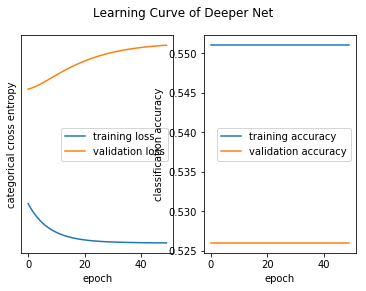

In [9]:
model_deep=DeepNet()
model_deep.apply(weights_init)
model_deep,train_loss_deep,train_accuracy_deep, test_loss_deep,test_accuracy_deep=train_model(model_deep,if_print=True,
                                                                                              optim='Adam',learning_rate=0.01)
evaluate_result(train_loss_deep,train_accuracy_deep, test_loss_deep,test_accuracy_deep, 'Learning Curve of Deeper Net')

In [11]:
import numpy as np
np.save('save/train_loss_deep.npy',np.array(train_loss_deep))
np.save('save/train_accuracy_deep.npy',np.array(train_accuracy_deep ))
np.save('save/test_loss_deep.npy',np.array(test_loss_deep ))
np.save('save/test_accuracy_deep.npy',np.array(test_accuracy_deep ))

### 4.5.2 Going Deeper with Residual Block

In [8]:
class DeepNet_Res(nn.Module):
    '''
    define Deeper CNN model with residual block
   
    '''
    def __init__(self,dropout=0.3):
        super(DeepNet_Res, self).__init__()
        self.conv1 = nn.Conv2d(2, 8, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16*6*6 ,64)
        self.fc2 = nn.Linear(64, 2)
        self.conv4 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(16, 16, kernel_size=3, padding=1)

        self.bn1=torch.nn.BatchNorm2d(16)
        self.bn2=torch.nn.BatchNorm2d(16)
        self.bn3=torch.nn.BatchNorm2d(16)
        
        self.dropout=dropout


    def forward(self, x):
        x=self.conv1(x)
        x=F.relu(x)
        x=self.conv2(x)
        x=F.relu(x)
        x=self.bn1(x)
        x=F.max_pool2d(x, kernel_size=2, stride=2)
        

        # for later residual operation
        x1=x
        # after this, build 6 same convolution layers
        x=self.conv3(x)
        x=F.relu(x)
        
        x=self.conv4(x)
        x=F.relu(x)
        x=self.bn2(x)
        
        
        # residual operation
        x=x1+x
        # for later residual operation
        x2=x
        
        x=self.conv5(x)
        x=F.relu(x)
        
        x=self.conv6(x)
        x=F.relu(x)
        x=self.bn3(x)
        
        #  residual operation
        x=x2+x
       
        x=x.view(x.size(0),-1)
        x=self.fc1(x)
        if self.dropout>0:
            x = F.dropout(x, p=self.dropout,training=self.training)
        x=F.relu(x)
        x = self.fc2(x)
    
        return x
    
    def predict(self, x):
        logits = self.forward(x)
        return F.softmax(logits)

Epoch: 1/45.. Training Loss: 0.5397.. Training Accuracy: 0.7330.. Validation Loss: 0.5568.. Validation Accuracy: 0.7250..
Epoch: 2/45.. Training Loss: 0.4486.. Training Accuracy: 0.7850.. Validation Loss: 0.5019.. Validation Accuracy: 0.7780..
Epoch: 3/45.. Training Loss: 0.3524.. Training Accuracy: 0.8600.. Validation Loss: 0.4643.. Validation Accuracy: 0.7910..
Epoch: 4/45.. Training Loss: 0.2786.. Training Accuracy: 0.8860.. Validation Loss: 0.4607.. Validation Accuracy: 0.7910..
Epoch: 5/45.. Training Loss: 0.1880.. Training Accuracy: 0.9280.. Validation Loss: 0.5308.. Validation Accuracy: 0.8010..
Epoch: 6/45.. Training Loss: 0.2244.. Training Accuracy: 0.9040.. Validation Loss: 0.6354.. Validation Accuracy: 0.7610..
Epoch: 7/45.. Training Loss: 0.1942.. Training Accuracy: 0.9330.. Validation Loss: 0.6103.. Validation Accuracy: 0.7920..
Epoch: 8/45.. Training Loss: 0.2982.. Training Accuracy: 0.8830.. Validation Loss: 0.7150.. Validation Accuracy: 0.7620..
Epoch: 9/45.. Training L

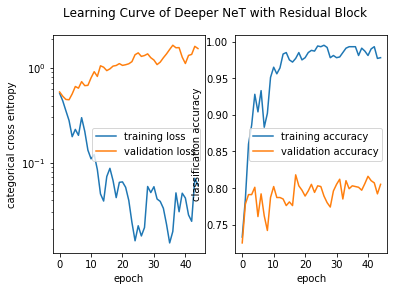

In [9]:
model_deep_res=DeepNet_Res()
model_deep_res.apply(weights_init)
model_deep_res,train_loss_deep_res,train_accuracy_deep_res, test_loss_deep_res,test_accuracy_deep_res=\
                              train_model(model_deep_res,if_print=True, optim='Adam',learning_rate=0.01,epochs=45)
evaluate_result(train_loss_deep_res,train_accuracy_deep_res, test_loss_deep_res,test_accuracy_deep_res,
                'Learning Curve of Deeper NeT with Residual Block')

In [11]:
import numpy as np
np.save('save/train_loss_deep_res.npy',np.array(train_loss_deep_res))
np.save('save/train_accuracy_deep_res.npy',np.array(train_accuracy_deep_res ))
np.save('save/test_loss_deep_res.npy',np.array(test_loss_deep_res ))
np.save('save/test_accuracy_deep_res.npy',np.array(test_accuracy_deep_res ))

### Comparison with Original CNN and CNN with Tricks

In [12]:
import numpy as np
train_loss_cnn2_bn=np.load('save/train_loss_cnn2_bn.npy')
train_accuracy_cnn2_bn=np.load('save/train_accuracy_cnn2_bn.npy')
test_loss_cnn2_bn=np.load('save/test_loss_cnn2_bn.npy')
test_accuracy_cnn2_bn=np.load('save/test_accuracy_cnn2_bn.npy')

In [21]:
train_loss_cnn2=np.load('save/train_loss_cnn2.npy')
train_accuracy_cnn2=np.load('save/train_accuracy_cnn2.npy')
test_loss_cnn2=np.load('save/test_loss_cnn2.npy')
test_accuracy_cnn2=np.load('save/test_accuracy_cnn2.npy')

In [13]:
plot_different_histories(train_loss_cnn2,train_accuracy_cnn2, test_loss_cnn2,test_accuracy_cnn2,
                             train_loss_cnn2_dp,train_accuracy_cnn2_dp,test_loss_cnn2_dp,test_accuracy_cnn2_dp,
                             train_loss_cnn2_bn,train_accuracy_cnn2_bn, test_loss_cnn2_bn,test_accuracy_cnn2_bn,
                             train_loss_cnn2_sigmoid_bn,train_accuracy_cnn2_sigmoid_bn,test_loss_cnn2_sigmoid_bn,test_accuracy_cnn2_sigmoid_bn,
                             train_loss_list_5=train_loss_deep_res,train_accuracy_list_5=train_accuracy_deep_res, 
                             test_loss_list_5=test_loss_deep_res,test_accuracy_list_5=test_accuracy_deep_res,
                             label_1='Original CNN', label_2='CNN with Dropout', label_3='CNN with Batch Normalization', 
                             label_4='CNN with Sigmoid and Batch Normalization', label_5='Deeper CNN with Residual Block',
                             title='Learning Curves of Original CNN and CNN with Tricks', nb=5)train_loss_cnn2_sigmoid_bn=np.load('save/train_loss_cnn2_sigmoid_bn.npy')
train_accuracy_cnn2_sigmoid_bn=np.load('save/train_accuracy_cnn2_sigmoid_bn.npy')
test_loss_cnn2_sigmoid_bn=np.load('save/test_loss_cnn2_sigmoid_bn.npy')
test_accuracy_cnn2_sigmoid_bn=np.load('save/test_accuracy_cnn2_sigmoid_bn.npy')

In [14]:
train_loss_cnn2_dp=np.load('save/train_loss_cnn2_dp.npy')
train_accuracy_cnn2_dp=np.load('save/train_accuracy_cnn2_dp.npy')
test_loss_cnn2_dp=np.load('save/test_loss_cnn2_dp.npy')
test_accuracy_cnn2_dp=np.load('save/test_accuracy_cnn2_dp.npy')

In [15]:
train_loss_deep_res=np.load('save/train_loss_deep_res.npy')
train_accuracy_deep_res=np.load('save/train_accuracy_deep_res.npy')
test_loss_deep_res=np.load('save/test_loss_deep_res.npy')
test_accuracy_deep_res=np.load('save/test_accuracy_mlp3.npy')

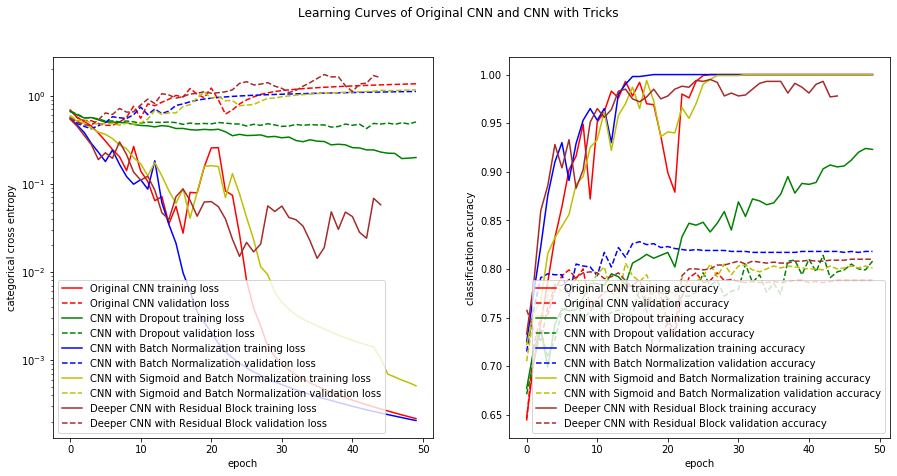

In [24]:
plot_different_histories(train_loss_cnn2,train_accuracy_cnn2, test_loss_cnn2,test_accuracy_cnn2,
                             train_loss_cnn2_dp,train_accuracy_cnn2_dp,test_loss_cnn2_dp,test_accuracy_cnn2_dp,
                             train_loss_cnn2_bn,train_accuracy_cnn2_bn, test_loss_cnn2_bn,test_accuracy_cnn2_bn,
                             train_loss_cnn2_sigmoid_bn,train_accuracy_cnn2_sigmoid_bn,test_loss_cnn2_sigmoid_bn,test_accuracy_cnn2_sigmoid_bn,
                             train_loss_list_5=train_loss_deep_res,train_accuracy_list_5=train_accuracy_deep_res, 
                             test_loss_list_5=test_loss_deep_res,test_accuracy_list_5=test_accuracy_deep_res,
                             label_1='Original CNN', label_2='CNN with Dropout', label_3='CNN with Batch Normalization', 
                             label_4='CNN with Sigmoid and Batch Normalization', label_5='Deeper CNN with Residual Block',
                             title='Learning Curves of Original CNN and CNN with Tricks', nb=5)

# 5. Combination with Features from Digit Class : Weight Sharing

In [8]:
class ConvNet_WS(nn.Module):

    def __init__(self ):
        super(ConvNet_WS, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3)
        self.fc1 = nn.Linear(16*6*6 ,64)
        self.fc2 = nn.Linear(64, 10)
        self.fc3 = nn.Linear(128, 16)
        self.fc4 = nn.Linear(16, 2)
        #self.fc5  = nn.Linear(64,2)
        self.bn8 = torch.nn.BatchNorm2d(8)
        self.bn16 = torch.nn.BatchNorm2d(16)
        
        
    def subforward(self,temp_x):
        # define the function of training of each digit in a pair
        # return:
        # temp_x: digit information (10) 
        # x: feature map for later binary classification
        temp_x=self.conv1(temp_x)
        temp_x=F.relu(temp_x) 
        temp_x=self.bn8(temp_x)
         
        
        temp_x=self.conv2(temp_x)
        temp_x=F.relu(temp_x)
        temp_x=self.bn16(temp_x)
        
        temp_x=F.max_pool2d(temp_x, kernel_size=2, stride=2)
        
        temp_x=temp_x.view(temp_x.size(0),-1)
        temp_x=self.fc1(temp_x)
        temp_x=F.relu(temp_x)
        # store current feature map for later binary classification
        x=temp_x   
        # continue for digit classification
        temp_x=self.fc2(temp_x)
        return temp_x, x
        
    def forward(self, x):
        # get 2 digits in each pair
        x1=x[:,0,:,:].view(x.size(0),1,14,14)
        x2=x[:,1,:,:].view(x.size(0),1,14,14)
        
        # get 2 digit classification information and feature maps for later binary classification
        temp_x1,new_x1=self.subforward(x1)
        temp_x2,new_x2=self.subforward(x2)
        # concatenate the feature maps from 2 digit training
        new_x=torch.cat((new_x1.view(-1,64), new_x2.view(-1, 64)), 1)
        # finish the binary classification
        new_x=F.relu(self.fc3(new_x))
        new_x=self.fc4(new_x)
        
        return temp_x1,temp_x2,new_x

In [9]:
def train_model_WS(model , optim='SGD', if_auxiliary_loss=False,auxiliary_loss_ratio=1,
                train_input=train_input, train_target=train_target, train_class=train_class,
                test_input=test_input, test_target=test_target, test_class=test_class,
                epochs=50, batch_size=100, learning_rate=1e-3,
                 if_print=False):
    criterion = nn.CrossEntropyLoss()
    if optim=='SGD':
        optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
    elif optim=='Adam':
        optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
    train_loss_list=train_accuracy_list=[]
    valid_loss_list=valid_accuracy_list=[]
    test_loss_list=test_accuracy_list=[]
    for e in range(epochs):
        for b in range(0, train_input.size(0), batch_size):
            temp_train_input=train_input.narrow(0, b, batch_size)    
            temp_train_target=train_target.narrow(0, b, batch_size)
            temp_train_class=train_class.narrow(0, b, batch_size)
            x1_output,x2_output,train_output = model(temp_train_input)
            loss = criterion(train_output, temp_train_target)
            auxiliary_loss_1 = criterion(x1_output, temp_train_class[:,0])      
            auxiliary_loss_2 = criterion(x2_output, temp_train_class[:,1]) 
            auxiliary_loss=auxiliary_loss_1+auxiliary_loss_ratio*auxiliary_loss_2
            if if_auxiliary_loss:
                temp_weight=(epochs-e)/epochs
                loss=loss+auxiliary_loss*auxiliary_loss_ratio*temp_weight
                
            model.zero_grad()
            loss.backward()
            optimizer.step()
                
        _,_,train_temp_output = model(train_input)
        train_temp_loss = criterion(train_temp_output, train_target)
        _, temp_train_pred =torch.max(F.softmax(train_temp_output).data, 1)
        train_temp_accuracy=((temp_train_pred == train_target).sum().item())/train_input.size(0)
        
        _,_,test_temp_output=model(test_input)
        test_temp_loss = criterion(test_temp_output, test_target)
        _, temp_test_pred =torch.max(F.softmax(test_temp_output).data, 1)
        test_temp_accuracy=((temp_test_pred == test_target).sum().item())/test_input.size(0)
        
        train_loss_list=train_loss_list+[train_temp_loss]
        train_accuracy_list=train_accuracy_list+[train_temp_accuracy]
        test_loss_list=test_loss_list+[test_temp_loss]
        test_accuracy_list=test_accuracy_list+[test_temp_accuracy]
        
        if if_print:
            print("Epoch: {}/{}..".format(e+1, epochs),
                  "Training Loss: {:.4f}..".format(train_temp_loss),
                  "Training Accuracy: {:.4f}..".format(train_temp_accuracy), 
                  "Validation Loss: {:.4f}..".format(test_temp_loss),
                  "Validation Accuracy: {:.4f}..".format(test_temp_accuracy),  )
                

    return model, train_loss_list,train_accuracy_list, test_loss_list,test_accuracy_list
        

### 5.1 Weight without Auxiliary Loss

Epoch: 1/30.. Training Loss: 0.5923.. Training Accuracy: 0.7010.. Validation Loss: 0.6093.. Validation Accuracy: 0.6880..
Epoch: 2/30.. Training Loss: 0.4492.. Training Accuracy: 0.7870.. Validation Loss: 0.4823.. Validation Accuracy: 0.7820..
Epoch: 3/30.. Training Loss: 0.3549.. Training Accuracy: 0.8360.. Validation Loss: 0.4207.. Validation Accuracy: 0.8080..
Epoch: 4/30.. Training Loss: 0.2908.. Training Accuracy: 0.8640.. Validation Loss: 0.3918.. Validation Accuracy: 0.8230..
Epoch: 5/30.. Training Loss: 0.2377.. Training Accuracy: 0.9090.. Validation Loss: 0.3798.. Validation Accuracy: 0.8420..
Epoch: 6/30.. Training Loss: 0.1937.. Training Accuracy: 0.9350.. Validation Loss: 0.3792.. Validation Accuracy: 0.8360..
Epoch: 7/30.. Training Loss: 0.1464.. Training Accuracy: 0.9570.. Validation Loss: 0.3870.. Validation Accuracy: 0.8400..
Epoch: 8/30.. Training Loss: 0.1043.. Training Accuracy: 0.9800.. Validation Loss: 0.4038.. Validation Accuracy: 0.8440..
Epoch: 9/30.. Training L

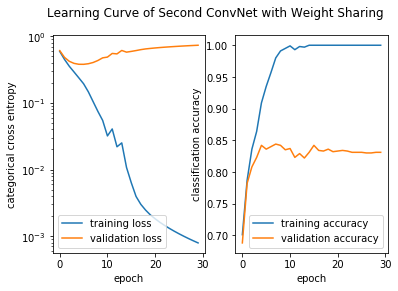

In [10]:
model_ws=ConvNet_WS()
model_ws.apply(weights_init)
model_ws,train_loss_ws,train_accuracy_ws, test_loss_ws,test_accuracy_ws=\
                                  train_model_WS(model_ws, if_auxiliary_loss=False,epochs=30,if_print=True, optim='Adam')
evaluate_result(train_loss_ws,train_accuracy_ws, test_loss_ws,test_accuracy_ws,\
                'Learning Curve of Second ConvNet with Weight Sharing')

In [10]:
import numpy as np
np.save('save/test_accuracy_ws.npy',np.array(test_accuracy_ws ))
np.save('save/train_accuracy_ws.npy',np.array(train_accuracy_ws ))

### 5.2 Weight with Auxiliary Loss

Epoch: 1/30.. Training Loss: 0.6781.. Training Accuracy: 0.6240.. Validation Loss: 0.6782.. Validation Accuracy: 0.6090..
Epoch: 2/30.. Training Loss: 0.6313.. Training Accuracy: 0.6310.. Validation Loss: 0.6310.. Validation Accuracy: 0.6320..
Epoch: 3/30.. Training Loss: 0.5627.. Training Accuracy: 0.7160.. Validation Loss: 0.5574.. Validation Accuracy: 0.7140..
Epoch: 4/30.. Training Loss: 0.5188.. Training Accuracy: 0.7330.. Validation Loss: 0.5145.. Validation Accuracy: 0.7380..
Epoch: 5/30.. Training Loss: 0.4813.. Training Accuracy: 0.7580.. Validation Loss: 0.4815.. Validation Accuracy: 0.7700..
Epoch: 6/30.. Training Loss: 0.4470.. Training Accuracy: 0.7760.. Validation Loss: 0.4528.. Validation Accuracy: 0.7960..
Epoch: 7/30.. Training Loss: 0.4149.. Training Accuracy: 0.8080.. Validation Loss: 0.4270.. Validation Accuracy: 0.8120..
Epoch: 8/30.. Training Loss: 0.3859.. Training Accuracy: 0.8260.. Validation Loss: 0.4070.. Validation Accuracy: 0.8300..
Epoch: 9/30.. Training L

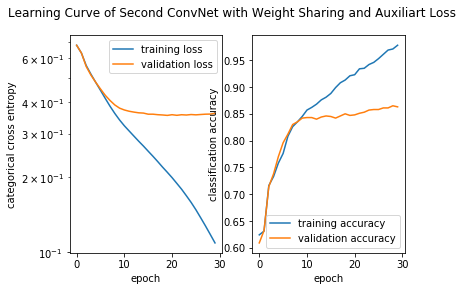

In [10]:
model_ws_al=ConvNet_WS()
model_ws_al.apply(weights_init)
model_ws_al,train_loss_ws_al,train_accuracy_ws_al, test_loss_ws_al,test_accuracy_ws_al=\
                                  train_model_WS(model_ws_al, if_auxiliary_loss=True,epochs=30,optim='Adam',
                                                 if_print=True,auxiliary_loss_ratio=5)
evaluate_result(train_loss_ws_al,train_accuracy_ws_al, test_loss_ws_al,test_accuracy_ws_al,\
                'Learning Curve of Second ConvNet with Weight Sharing and Auxiliart Loss')

In [10]:
import numpy as np
np.save('save/test_accuracy_ws_al.npy',np.array(test_accuracy_ws_al ))
np.save('save/train_accuracy_ws_al.npy',np.array(train_accuracy_ws_al ))

# 6. Do the Binary Classification Directly by Digit Classification

In [8]:
class CNN_digit(nn.Module):
    def __init__(self, dropout=0.2):
        super(CNN_digit, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.fc1 = nn.Linear(16*6*6 ,64)
        self.fc2 = nn.Linear(64, 10)
        self.bn8 = torch.nn.BatchNorm2d(8)
        self.bn16 = torch.nn.BatchNorm2d(16)
        self.bn32 = torch.nn.BatchNorm2d(32)
        self.dropout=dropout
        
    def forward(self, x):
        x=x.view(x.size(0),1,14,14)
        x=self.conv1(x)

        x=F.relu(x)
        x=self.bn8(x)
            
        x=self.conv2(x)
        x=F.relu(x)
        x=self.bn16(x)
        
        x = F.dropout(x, p=self.dropout,training=self.training)
         
        x=F.max_pool2d(x, kernel_size=2, stride=2)
        

        
        x=x.view(x.size(0),-1)
        x=self.fc1(x)
        x=F.relu(x)
        x = self.fc2(x)
    
        return x
    
    def predict(self, x):
        logits = self.forward(x)
        return F.softmax(logits)


In [9]:
def train_by_digit(model , optim='SGD',
                train_input=train_input, train_class=train_class, train_target=train_target,
                test_input=test_input, test_class=test_class, test_target=test_target,
                epochs=50, batch_size=100, learning_rate=1e-3, momentum=0,
                 if_print=False):
    criterion = nn.CrossEntropyLoss()
    if optim=='SGD':
        optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=momentum)
    elif optim=='Adam':
        optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
    test_accuracy_list=train_accuracy_list=[]
    digit_train_accuracy_list=digit_test_accuracy_list=[]
    digit_train_loss_list=digit_test_loss_list=[]
    
    for e in range(epochs):
        for b in range(0, train_input.size(0), batch_size):
            temp_train_input=train_input.narrow(0, b, batch_size)    
            temp_train_class=train_class.narrow(0, b, batch_size)
            train_output_1 = model(temp_train_input[:,0,:,:])
            train_output_2 = model(temp_train_input[:,1,:,:])
            loss = criterion(train_output_1, temp_train_class[:,0])+criterion(train_output_2, temp_train_class[:,1])
            model.zero_grad()
            loss.backward()
            optimizer.step()
                
        train_temp_output_1 = model(train_input[:,0,:,:])
        train_temp_output_2 = model(train_input[:,1,:,:])
        _, temp_train_pred_1 =torch.max(F.softmax(train_temp_output_1).data, 1)
        _, temp_train_pred_2 =torch.max(F.softmax(train_temp_output_2).data, 1)
        train_temp_output=temp_train_pred_1<=temp_train_pred_2

        
        train_temp_accuracy=((train_temp_output.int() == train_target.int()).sum().item())/train_input.size(0)
        train_digit_accracy_1=(temp_train_pred_1.int()==train_class[:,0].int()).sum().item()/train_input.size(0)
        train_digit_accracy_2=(temp_train_pred_2.int()==train_class[:,1].int()).sum().item()/train_input.size(0)
        train_digit_accracy=(train_digit_accracy_1+train_digit_accracy_2)/2
        digit_train_accuracy_list=digit_train_accuracy_list+[train_digit_accracy]
        train_digit_loss = criterion(train_temp_output_1, train_class[:,0])+criterion(train_temp_output_2, train_class[:,1])
        digit_train_loss_list=digit_train_loss_list+[train_digit_loss]
 
        
        test_temp_output_1 = model(test_input[:,0,:,:])
        test_temp_output_2 = model(test_input[:,1,:,:])
        _, temp_test_pred_1 =torch.max(F.softmax(test_temp_output_1).data, 1)
        _, temp_test_pred_2 =torch.max(F.softmax(test_temp_output_2).data, 1)
        test_pred_output=temp_test_pred_1<=temp_test_pred_2
        test_digit_loss = criterion(test_temp_output_1, test_class[:,0])+criterion(test_temp_output_2, test_class[:,1])
        digit_test_loss_list=digit_test_loss_list+[test_digit_loss]
        

        test_temp_accuracy=((test_pred_output.int() == test_target.int()).sum().item())/test_input.size(0)
        test_digit_accracy=((temp_test_pred_1.int()==test_class[:,0].int()).sum().item()+(temp_test_pred_2.int()==test_class[:,1].int()).sum().item())/(2*test_input.size(0))
        digit_test_accuracy_list=digit_test_accuracy_list+[test_digit_accracy]
        
        
        train_accuracy_list=train_accuracy_list+[train_temp_accuracy]
        test_accuracy_list=test_accuracy_list+[test_temp_accuracy]
        
        if if_print:
            print("Epoch: {}/{}..".format(e+1, epochs),
                  "Digit Training Loss: {:.4f}..".format(train_digit_loss),
                  "Digit Training Accuracy: {:.4f}..".format(train_digit_accracy),

                  "Boolea n Training Accuracy: {:.4f}..".format(train_temp_accuracy),
                  
                  "Digit Validation Loss: {:.4f}..".format(test_digit_loss),
                  "Digit Validation Accuracy: {:.4f}..".format(test_digit_accracy),

                  "Boolean Validation Accuracy: {:.4f}..".format(test_temp_accuracy)  )
                

    return model, digit_train_loss_list,digit_train_accuracy_list, train_accuracy_list,digit_test_loss_list,digit_test_accuracy_list,test_accuracy_list
        

Epoch: 1/29.. Digit Training Loss: 2.6958.. Digit Training Accuracy: 0.7270.. Boolea n Training Accuracy: 0.8360.. Digit Validation Loss: 2.7800.. Digit Validation Accuracy: 0.7095.. Boolean Validation Accuracy: 0.8380..
Epoch: 2/29.. Digit Training Loss: 1.3285.. Digit Training Accuracy: 0.8555.. Boolea n Training Accuracy: 0.9070.. Digit Validation Loss: 1.4387.. Digit Validation Accuracy: 0.8320.. Boolean Validation Accuracy: 0.8950..
Epoch: 3/29.. Digit Training Loss: 0.7990.. Digit Training Accuracy: 0.8970.. Boolea n Training Accuracy: 0.9340.. Digit Validation Loss: 0.9017.. Digit Validation Accuracy: 0.8785.. Boolean Validation Accuracy: 0.9180..
Epoch: 4/29.. Digit Training Loss: 0.5624.. Digit Training Accuracy: 0.9300.. Boolea n Training Accuracy: 0.9540.. Digit Validation Loss: 0.6840.. Digit Validation Accuracy: 0.9020.. Boolean Validation Accuracy: 0.9300..
Epoch: 5/29.. Digit Training Loss: 0.4571.. Digit Training Accuracy: 0.9390.. Boolea n Training Accuracy: 0.9620.. D

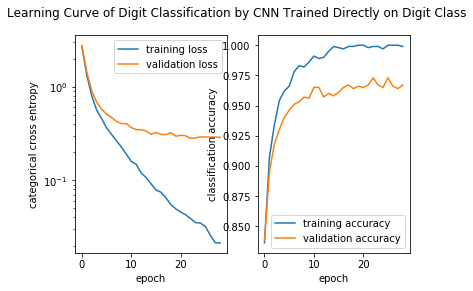

In [10]:
model_digit=CNN_digit()
model_digit.apply(weights_init)
model_digit, digit_train_loss,_,digit_train_accuracy,digit_test_loss,_,digit_test_accuracy=\
                                                train_by_digit(model_digit,if_print=True, epochs=29,
                                                               optim='Adam', learning_rate=0.001)
evaluate_result(digit_train_loss,digit_train_accuracy, digit_test_loss,digit_test_accuracy,
                'Learning Curve of Digit Classification by CNN Trained Directly on Digit Class') 

In [14]:
import numpy as np
np.save('save/train_accuracy_from_digit.npy',np.array(train_accuracy_from_digit ))
np.save('save/test_accuracy_from_digit.npy',np.array(test_accuracy_from_digit ))

# Comparison of Combinations of CNN Models and Features from Digit Class

In [17]:
train_accuracy_cnn2_bn=np.load('save/train_accuracy_cnn2_bn.npy')[:30]
test_accuracy_cnn2_bn=np.load('save/test_accuracy_cnn2_bn.npy')[:30]

In [18]:
train_accuracy_ws=np.load('save/train_accuracy_ws.npy')
test_accuracy_ws=np.load('save/test_accuracy_ws.npy')

In [19]:
train_accuracy_ws_al=np.load('save/train_accuracy_ws_al.npy')
test_accuracy_ws_al=np.load('save/test_accuracy_ws_al.npy')

In [20]:
train_accuracy_from_digit=np.load('save/train_accuracy_from_digit.npy')
test_accuracy_from_digit=np.load('save/test_accuracy_from_digit.npy')

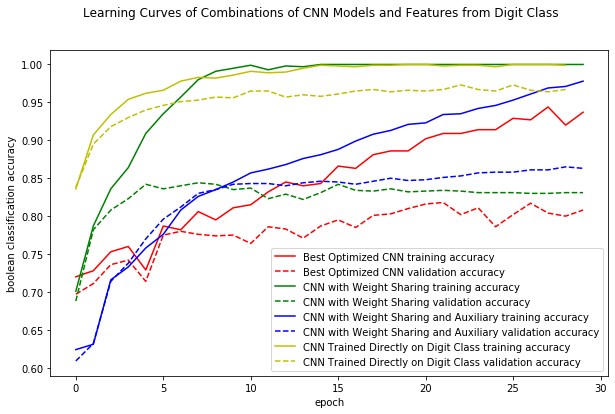

In [21]:
plot_different_histories(None,train_accuracy_cnn2_bn,None,test_accuracy_cnn2_bn,
                             None,train_accuracy_ws, None,test_accuracy_ws,
                             None,train_accuracy_ws_al,None,test_accuracy_ws_al,
                             None,train_accuracy_from_digit, None,test_accuracy_from_digit,
                             
                             label_1='Best Optimized CNN', label_2='CNN with Weight Sharing', label_3='CNN with Weight Sharing and Auxiliary', 
                             label_4='CNN Trained Directly on Digit Class',
                             title='Learning Curves of Combinations of CNN Models and Features from Digit Class')